# Структура проекта

# Постановка цели

Составить портрет вакансий Data Scientist и Data Analytist по телеграм-каналам, по критериям:
- наличие высшего технического образования;
- уровнеь владения английским языком;
- требования к уровню навыков - junior, middle, senior;
- условия работы - удалённая, офис, удалёнка.

# Предобработка данных

- исследовать пропущенные значения
- исследовать соответствие типов данных и привести к нужному
- проверка наименований колонок и привести к корректную форму при необходимости
- привести данные к нижнему регистру
- удалить дубликаты.
- удалить пропуски.
- сортировать по дате.

Далее, определиться: использовать лемматизацию текста и выделять леммы для поиска уникальных ключевых слов, либо использовать регулярные выражения для поиска однокоренных слов.

- Объединить вакансии в две категории Data Scientist и Data Analytist.
- Создать столбец с уровнем образования.
- Создать столбец с наличием опыта работы.
- Создать столбец с требованиями по уровню навыков - junior, middle, senior.
- Создать столбец по условию работы - удалённо или офис.

# Анализ данных

Провести анализ двух типов вакансий и посмотреть как каждая из них отличалась от прошлого года.

- Провести анализ количества вакансий для DA и DS.
- Провести анализ по образованию.
- Провести анализ по уровню владения английским языком.
- Анализ по требованиям к уровню навыков - junior, middle, senior.
- Анализ по работе - удалённая или офис.

Описать выводы, построить графики и диаграммы для отображения результатов.

# Импорт библиотек

In [ ]:
# import pyrogram
import requests
import numpy as np
from bs4 import BeautifulSoup
# from dotenv import load_dotenv
import os
# from pyrogram import Client
import pandas as pd
import json
from datetime import datetime
import re
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from pylab import rcParams

# Парсер вакансий

In [ ]:
'''!pip install pyrogram tgcrypto'''

'!pip install pyrogram tgcrypto'

In [ ]:
'''!pip install python-dotenv'''

'!pip install python-dotenv'

In [ ]:
# pyrogram.__version__

### Подготовим api_id и api_hash

In [ ]:
'''# ключи App api_id и App api_hash прописаны в файле
dotenv_path = os.path.join('dot.env')
if os.path.exists(dotenv_path):
    load_dotenv(dotenv_path)'''

"# ключи App api_id и App api_hash прописаны в файле\ndotenv_path = os.path.join('dot.env')\nif os.path.exists(dotenv_path):\n    load_dotenv(dotenv_path)"

In [ ]:
'''os.environ['DEMO']'''

"os.environ['DEMO']"

In [ ]:
'''API_ID = os.environ['API_ID']
API_HASH = os.environ['API_HASH']'''

"API_ID = os.environ['API_ID']\nAPI_HASH = os.environ['API_HASH']"

In [ ]:
'''# Первый раз запускаем из терминала чтобы получился файл my_account.session
# Файл авторизации и тестирования pyro_auth.py 

path = os.path.dirname(os.path.abspath('C:/Users/julij/Desktop/telegram/pyro_auth.py')) 

dotenv_path = os.path.join(path + '/dot.env') # прибавляем к пути файл с данными для авторизации
if os.path.exists(dotenv_path): # проверяем существует ли файл
    load_dotenv(dotenv_path) # загружаем файл
    
API_ID = os.environ['API_ID'] # из окружения достаем API ID
API_HASH = os.environ['API_HASH'] # и API HASH
async with Client("my_account", API_ID, API_HASH) as app: # задаем название сессии, появится файлик
    await app.send_message("me", "Авторизация прошла успешно") # отправим себе сообщение
'''

'# Первый раз запускаем из терминала чтобы получился файл my_account.session\n# Файл авторизации и тестирования pyro_auth.py \n\npath = os.path.dirname(os.path.abspath(\'C:/Users/julij/Desktop/telegram/pyro_auth.py\')) \n\ndotenv_path = os.path.join(path + \'/dot.env\') # прибавляем к пути файл с данными для авторизации\nif os.path.exists(dotenv_path): # проверяем существует ли файл\n    load_dotenv(dotenv_path) # загружаем файл\n    \nAPI_ID = os.environ[\'API_ID\'] # из окружения достаем API ID\nAPI_HASH = os.environ[\'API_HASH\'] # и API HASH\nasync with Client("my_account", API_ID, API_HASH) as app: # задаем название сессии, появится файлик\n    await app.send_message("me", "Авторизация прошла успешно") # отправим себе сообщение\n'

In [ ]:
'''# Файл выгрузки (pyro_run.py)
# должна быть прописана переменная targets

path = os.path.dirname(os.path.abspath('C:/Users/julij/Desktop/telegram/pyro_auth.py'))

dotenv_path = os.path.join(path + '/dot.env') #
if os.path.exists(dotenv_path):
    load_dotenv(dotenv_path)
    

API_ID = os.environ['API_ID']
API_HASH = os.environ['API_HASH']'''

"# Файл выгрузки (pyro_run.py)\n# должна быть прописана переменная targets\n\npath = os.path.dirname(os.path.abspath('C:/Users/julij/Desktop/telegram/pyro_auth.py'))\n\ndotenv_path = os.path.join(path + '/dot.env') #\nif os.path.exists(dotenv_path):\n    load_dotenv(dotenv_path)\n    \n\nAPI_ID = os.environ['API_ID']\nAPI_HASH = os.environ['API_HASH']"

In [ ]:
'''# пустой список где храним сообщения 
all_messages = []'''

'# пустой список где храним сообщения \nall_messages = []'

In [ ]:
'''targets = (['datajobschannel','biheadhunter','analysts_hunter','data_hr',
            'datajob', 'analyst_job','foranalysts', 'datasciencejobs'])'''

"targets = (['datajobschannel','biheadhunter','analysts_hunter','data_hr',\n            'datajob', 'analyst_job','foranalysts', 'datasciencejobs'])"

In [ ]:
'''# просмотр 
async with Client("my_account", API_ID, API_HASH) as app:
    for target in targets:
        async for message in app.get_chat_history(target, limit=1):
            print(message.text) 
            print(message)'''

'# просмотр \nasync with Client("my_account", API_ID, API_HASH) as app:\n    for target in targets:\n        async for message in app.get_chat_history(target, limit=1):\n            print(message.text) \n            print(message)'

In [ ]:
'''# загрузка данных
from tqdm.notebook import tqdm'''

'# загрузка данных\nfrom tqdm.notebook import tqdm'

In [ ]:
'''# Основная (рабочая) часть кода выгрузки

try: 
    async with Client("my_account", API_ID, API_HASH) as app:
        for target in tqdm(targets):
            async for message in app.get_chat_history(target, limit=15000):
                all_messages.append([message.sender_chat,message.id,message.date,message.text,message.entities])
                
    df = pd.DataFrame(all_messages)
    df.columns = ["chat", "message_id", "date", "text", "entities"]
    df.to_csv(path + '/telegram.csv', index=False)
    print('Success: ', path + '/telegram.csv')
except Exception as e:
    print('Error: ', e)            
            '''

'# Основная (рабочая) часть кода выгрузки\n\ntry: \n    async with Client("my_account", API_ID, API_HASH) as app:\n        for target in tqdm(targets):\n            async for message in app.get_chat_history(target, limit=15000):\n                all_messages.append([message.sender_chat,message.id,message.date,message.text,message.entities])\n                \n    df = pd.DataFrame(all_messages)\n    df.columns = ["chat", "message_id", "date", "text", "entities"]\n    df.to_csv(path + \'/telegram.csv\', index=False)\n    print(\'Success: \', path + \'/telegram.csv\')\nexcept Exception as e:\n    print(\'Error: \', e)            \n            '

# Выгрузка файла

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pars/telegram.csv')

In [ ]:
df.head()

,chat,message_id,date,text,entities
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chat        4795 non-null   object
 1   message_id  34780 non-null  int64 
 2   date        34780 non-null  object
 3   text        31407 non-null  object
 4   entities    18026 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


# Предобработка данных

- исследовать пропущенные значения
- исследовать соответствие типов данных и привести к нужному
- проверка наименований колонок и привести к корректную форму при необходимости
- привести данные к нижнему регистру
- удалить дубликаты.
- удалить пропуски.
- сортировать по дате.

Далее, определиться: использовать лемматизацию текста и выделять леммы для поиска уникальных ключевых слов, либо использовать регулярные выражения для поиска однокоренных слов.

Объединить вакансии в две категории Data Scientist и Data Analytist.
- Создать столбец с уровнем образования.
- Создать столбец с требованиями по уровню навыков - junior, middle, senior.
- Создать столбец по условию работы - удалённо или офис.

In [ ]:
df = df.dropna().reset_index(drop=True) # сбросим индекс

In [ ]:
# исследовать пропущенные значения

df.isna().sum()

chat          0
message_id    0
date          0
text          0
entities      0
dtype: int64

In [ ]:
# исследовать соответствие типов данных и привести к нужному

df.date = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   chat        4261 non-null   object        
 1   message_id  4261 non-null   int64         
 2   date        4261 non-null   datetime64[ns]
 3   text        4261 non-null   object        
 4   entities    4261 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 166.6+ KB


In [ ]:
# привести данные к нижнему регистру

print(df.iloc[10]['text'].lower())

вакансия: developer bi
компания: гк родина - застройщик
формат: офис, после исп. срока гибрид г. москва
🔌200 000 - 250 000 на руки

о компании: гк родина- инвестиционно-девелоперская компания, группа осуществляет полный цикл девелопмента и оказывает весь спектр услуг по эффективному управлению проектами. компания создала свой формат развития городских территорий «инновационные жилые кластеры», в котором комфортное и безопасное городское жилье объединяется со значительным количеством инфраструктуры: спортивной, образовательной и культурной.

обязанности:

▪️анализ потребностей всех заинтересованных сторон в нужных для отчета показателях
▪️составление единого постоянно обновляемого тз и всех требований
▪️разработка нужных метрик согласно тз
▪️постановка задач подрядчикам и контроль их исполнения
▪️постоянный поиск возможностей для оптимизации и детализации отчета
▪️взаимодействие с подрядчиками по ведению бд

ждем от кандидата:

🔹опыт разработки на dax и sql от 2х лет;
🔹релевантный опыт 

In [ ]:
# удалить дубликаты.

df.duplicated().sum()

0

In [ ]:
# выделим столбец с годом

df['year'] = (df['date']).dt.year
df.head(2)

,chat,message_id,date,text,entities,year
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   chat        4261 non-null   object        
 1   message_id  4261 non-null   int64         
 2   date        4261 non-null   datetime64[ns]
 3   text        4261 non-null   object        
 4   entities    4261 non-null   object        
 5   year        4261 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 199.9+ KB


### Объединить вакансии в две категории Data Scientist и Data Analytist.

- Создать столбец с уровнем образования.
- Создать столбец с требованиями по уровню навыков - junior, middle, senior.
- Создать столбец по условию работы - удалённо или офис.

Let`s clean text and take 2022, 2021 years.

In [ ]:
# Ссылка
link = r'<.*?>'

# Номер телефона
tel = r'([78][-\( ]*\d{3}[-\) ]*\d{2,3}[ -]*\d{2,3}[ -]*\d{2,3}|' + \
      r'\(\d{3}\)\d{2,3}[ -]*\d{2,3}[ -]*\d{2,3})'


year_ranges = {str(k): '' for k in range(2001,2021,1)}
time_ramges = {i:'' for i in ['5/2', '10-19', '11-18', '11-19', '9-18', 'c 11 до 19']}
bonus = r'(\+.{0,5}?\d{2,3}.{0,25}?преми|\+ \d{2-3}-\d{2,3}|\+ \d{2,3})'

# Очищаем текст
df['clean_text'] = df.text
# Удаляем все ссылки из текста
df['clean_text'] = df.clean_text.str.replace(link, ' ')
# Удаляем телефоны из текста
df['clean_text'] = df.clean_text.str.replace(tel, ' ')
# Удаляем премии из текста
df['clean_text'] = df.clean_text.str.replace(bonus, ' ')
# Удаляем года из текста
df['clean_text'] = df.clean_text.replace(year_ranges, regex=True)
# Удаляем время из текста
df['clean_text'] = df.clean_text.replace(time_ramges, regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
df.head()

,chat,message_id,date,text,entities,year,clean_text
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...


In [ ]:
df['year'].unique()

array([2022, 2021, 2020, 2019])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   chat        4261 non-null   object        
 1   message_id  4261 non-null   int64         
 2   date        4261 non-null   datetime64[ns]
 3   text        4261 non-null   object        
 4   entities    4261 non-null   object        
 5   year        4261 non-null   int64         
 6   clean_text  4261 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 233.1+ KB


In [ ]:
remote_ex = r'(удаленка|remote|удаленно)'
 
df['remote'] = df['clean_text'].str.contains(remote_ex)
df['ofice'] = ~df['remote']

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,chat,message_id,date,text,entities,year,clean_text,remote,ofice
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...,False,True
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...,False,True
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...,True,False
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...,True,False
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...,False,True


In [ ]:
# let`s doing category ds & da
ds = r'ds|scien|дс|cаен|tensorflow|pytorch'
da = r'analyst|analysis|аналитик|bi|business intelligence|биай|tableau'

# Let's mark True or False where we have a match
df['ds'] = df['clean_text'].apply(lambda x: True if re.search(ds, x.lower()) else False)
df['da'] = df['clean_text'].apply(lambda x: True if re.search(da, x.lower()) else False)

df.head()

,chat,message_id,date,text,entities,year,clean_text,remote,ofice,ds,da
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...,False,True,True,False
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...,False,True,False,True
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...,True,False,False,True
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...,True,False,True,True
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...,False,True,True,True


In [ ]:
# let`s doing category Junior, Middle, Senior, Lead
Junior = r'(junior|джун|начинающ|стаж[её]р)'
Middle = r'(middle|\Wмидл|миддл)'
Senior = r'(senior|синьор|сеньор|\Wстарш)'
Lead = r'(\Wlead\W|\Whead\W|\Wлид\W|\Wведущ)'

# Let's mark True or False where we have a match
df['Junior'] = df['clean_text'].apply(lambda x: True if re.search(Junior, x.lower()) else False)
df['Middle'] = df['clean_text'].apply(lambda x: True if re.search(Middle, x.lower()) else False)
df['Senior'] = df['clean_text'].apply(lambda x: True if re.search(Senior, x.lower()) else False)
df['Lead'] = df['clean_text'].apply(lambda x: True if re.search(Lead, x.lower()) else False)

df.head(10)

,chat,message_id,date,text,entities,year,clean_text,remote,ofice,ds,da,Junior,Middle,Senior,Lead
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...,False,True,True,False,False,False,False,False
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...,False,True,False,True,False,False,False,True
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...,True,False,False,True,False,True,False,False
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...,True,False,True,True,False,False,False,False
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...,False,True,True,True,False,False,True,False
5,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1663,2022-09-07 13:12:29,#удаленка #системный_аналитик #вакансия \n\n⭕️...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n\n⭕️...,True,False,False,True,False,True,False,False
6,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1662,2022-09-06 17:07:16,#вакансия #работа #fulltime #job #vaсancy\n\n📍...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #работа #fulltime #job #vaсancy\n\n📍...,True,False,True,True,True,True,False,False
7,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1661,2022-09-05 15:02:04,#vacancy #вакансия #BI #Engineer #Tableau #Sen...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#vacancy #вакансия #BI #Engineer #Tableau #Sen...,True,False,False,True,False,False,True,False
8,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1660,2022-09-05 14:31:08,"ПРИВЕТ!\n\nЯ, рекрутер АО ""ГНИВЦ"", в поиске \...","[\n {\n ""_"": ""MessageEntity"",\n ...",2022,"ПРИВЕТ!\n\nЯ, рекрутер АО ""ГНИВЦ"", в поиске \...",False,True,False,False,False,False,False,False
9,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1659,2022-09-02 19:21:02,#вакансия #data #dataengineer #dataanalyst #bi...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #data #dataengineer #dataanalyst #bi...,False,True,True,True,False,False,False,False


In [ ]:
educ = r'(технич|математ|прикладн|информат)'

# Let's mark True or False where we have a match
df['education'] = df['clean_text'].apply(lambda x: True if re.search(educ, x.lower()) else False)

df.head()

,chat,message_id,date,text,entities,year,clean_text,remote,ofice,ds,da,Junior,Middle,Senior,Lead,education
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...,False,True,True,False,False,False,False,False,False
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...,False,True,False,True,False,False,False,True,False
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...,True,False,False,True,False,True,False,False,True
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...,True,False,True,True,False,False,False,False,False
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...,False,True,True,True,False,False,True,False,False


In [ ]:
english = r'(английск|A[123]|B[123]|C[123]|beginner|elementary|pre-Intermediate|intermediate|upper-intermediate|proficient|effective|operational|advanced|mastery|proficiency)'

# Let's mark True or False where we have a match
df['english'] = df['clean_text'].apply(lambda x: True if re.search(educ, x.lower()) else False)

df.head()

,chat,message_id,date,text,entities,year,clean_text,remote,ofice,ds,da,Junior,Middle,Senior,Lead,education,english
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1668,2022-09-09 13:46:35,#вакансия #vacancy #job #relocate #data #azure...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#вакансия #vacancy #job #relocate #data #azure...,False,True,True,False,False,False,False,False,False,False
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1667,2022-09-08 14:04:20,Привет! Нахожусь в поиске DBA в компанию Новак...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Привет! Нахожусь в поиске DBA в компанию Новак...,False,True,False,True,False,False,False,True,False,False
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1666,2022-09-08 10:22:12,#удаленка #системный_аналитик #вакансия \n \n...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,#удаленка #системный_аналитик #вакансия \n \n...,True,False,False,True,False,True,False,False,True,True
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1665,2022-09-07 19:36:26,Сейчас мы в поиске талантливого Data Analyst в...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,Сейчас мы в поиске талантливого Data Analyst в...,True,False,True,True,False,False,False,False,False,False
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269377842,...",1664,2022-09-07 18:09:06,На работу в крупную международную консалтингов...,"[\n {\n ""_"": ""MessageEntity"",\n ...",2022,На работу в крупную международную консалтингов...,False,True,True,True,False,False,True,False,False,False


### Исследуем вакансии

### DA & DS

In [ ]:
# для ДА сделаем табличку
df_da = df[(df['da'])]
df_da_an = df_da.pivot_table(index=['year'], values=['da'], aggfunc=['count']).reset_index()
df_da_an.columns=['year', 'da']

# для ДС сделаем табличку
df_ds = df[(df['ds'])]
df_ds_an = df_ds.pivot_table(index=['year'], values=['ds'], aggfunc=['count']).reset_index()
df_ds_an.columns=['year', 'ds']

# общую сделаем табличку
df_all = df_da_an.merge(df_ds_an, how='left', on='year')
df_all

,year,da,ds
0,2019,153,181
1,2020,468,407
2,2021,935,867
3,2022,1256,701


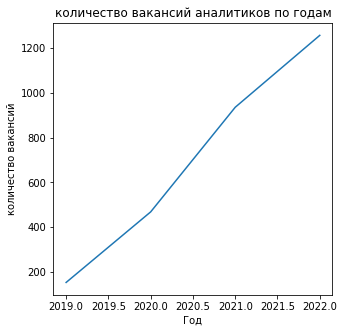

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_all, x = 'year', y = 'da').set(title = 'количество вакансий аналитиков по годам', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

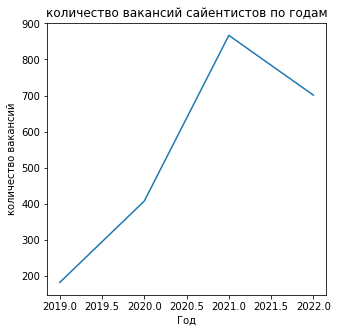

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_all, x = 'year', y = 'ds').set(title = 'количество вакансий сайентистов по годам', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

In [ ]:
# для education сделаем табличку
df_ed = df[(df['education'])]
df_ed_an = df_ed.pivot_table(index=['year'], values=['education'], aggfunc=['count']).reset_index()
df_ed_an.columns=['year', 'education']
df_ed_an

,year,education
0,2019,67
1,2020,239
2,2021,421
3,2022,275


Education - наличие техънического образования (включая математику, прикладноу высшее, информатику)

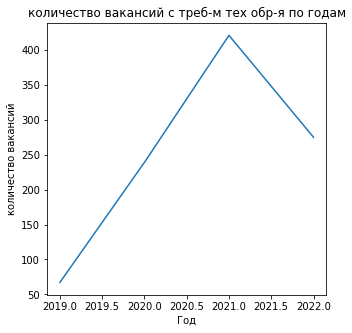

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_ed_an, x = 'year', y = 'education').set(title = 'количество вакансий с треб-м тех обр-я по годам', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

### Junior, Middle, Senior, Lead

In [ ]:
# для Junior сделаем табличку
df_j = df[(df['Junior'])]
df_j_an = df_j.pivot_table(index=['year'], values=['Junior'], aggfunc=['count']).reset_index()
df_j_an.columns=['year', 'Junior']

# для Middle сделаем табличку
df_m = df[(df['Middle'])]
df_m_an = df_m.pivot_table(index=['year'], values=['Middle'], aggfunc=['count']).reset_index()
df_m_an.columns=['year', 'Middle']

# для Senior сделаем табличку
df_s = df[(df['Senior'])]
df_s_an = df_s.pivot_table(index=['year'], values=['Senior'], aggfunc=['count']).reset_index()
df_s_an.columns=['year', 'Senior']

# для Lead сделаем табличку
df_l = df[(df['Lead'])]
df_l_an = df_l.pivot_table(index=['year'], values=['Lead'], aggfunc=['count']).reset_index()
df_l_an.columns=['year', 'Lead']

# общую сделаем табличку
df_jm = df_j_an.merge(df_m_an, how='left', on='year')
df_jms = df_jm.merge(df_s_an, how='left', on='year')
df_jmsl = df_jms.merge(df_l_an, how='left', on='year')
df_jmsl

,year,Junior,Middle,Senior,Lead
0,2019,18,25,63,29
1,2020,45,116,158,77
2,2021,141,301,303,140
3,2022,163,245,334,158


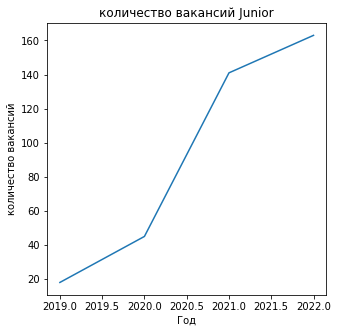

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_jmsl, x = 'year', y = 'Junior').set(title = 'количество вакансий Junior', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

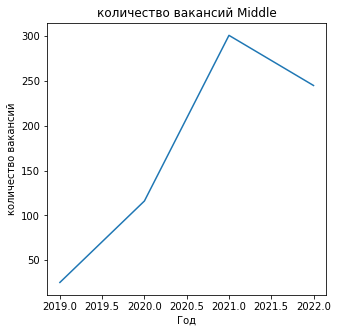

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_jmsl, x = 'year', y = 'Middle').set(title = 'количество вакансий Middle', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

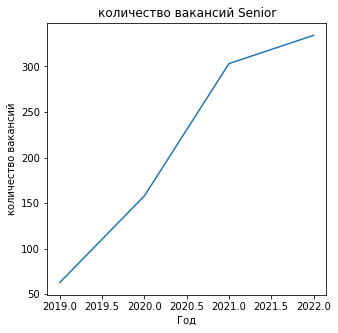

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_jmsl, x = 'year', y = 'Senior').set(title = 'количество вакансий Senior', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

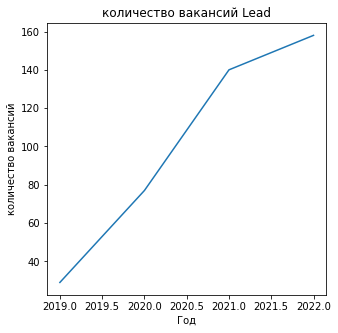

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_jmsl, x = 'year', y = 'Lead').set(title = 'количество вакансий Lead', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

Из всего виден спад вакансий в 2022 году. Остальные вакансии растут.

### Education

In [ ]:
# для Education сделаем табличку
df_ed = df[(df['education'])]
df_ed_an = df_ed.pivot_table(index=['year'], values=['education'], aggfunc=['count']).reset_index()
df_ed_an.columns=['year', 'education']
df_ed_an

,year,education
0,2019,67
1,2020,239
2,2021,421
3,2022,275


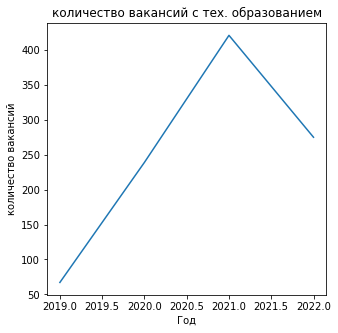

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_ed_an, x = 'year', y = 'education').set(title = 'количество вакансий с тех. образованием', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

Самый пик востребованности приходится на 2021 год. В 2022 году наблюдается спад.

### English

In [ ]:
# для English сделаем табличку
df_en = df[(df['english'])]
df_en_an = df_en.pivot_table(index=['year'], values=['english'], aggfunc=['count']).reset_index()
df_en_an.columns=['year', 'english']
df_en_an

,year,english
0,2019,67
1,2020,239
2,2021,421
3,2022,275


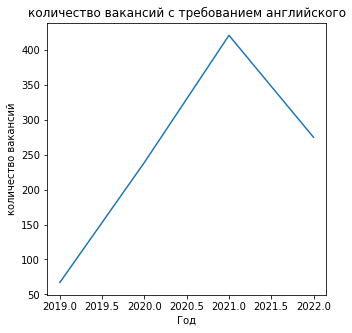

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_en_an, x = 'year', y = 'english').set(title = 'количество вакансий с требованием английского', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

Также отмечается пик в 2021 году, а в 2022 году спад.

### Remote & Office

In [ ]:
# для remote сделаем табличку
df_r = df[(df['remote'])]
df_r_an = df_r.pivot_table(index=['year'], values=['remote'], aggfunc=['count']).reset_index()
df_r_an.columns=['year', 'remote']

# для office сделаем табличку
df_of = df[(df['ds'])]
df_of_an = df_of.pivot_table(index=['year'], values=['ofice'], aggfunc=['count']).reset_index()
df_of_an.columns=['year', 'ofice']

# общую сделаем табличку
df_ro = df_r_an.merge(df_of_an, how='left', on='year')
df_ro

,year,remote,ofice
0,2019,43,181
1,2020,247,407
2,2021,603,867
3,2022,407,701


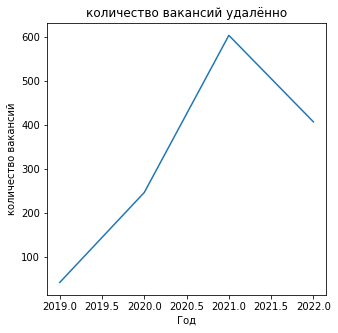

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_ro, x = 'year', y = 'remote').set(title = 'количество вакансий удалённо', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

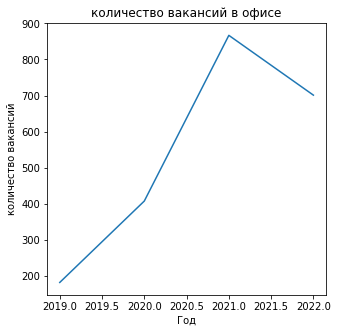

In [ ]:
plt.figure(figsize=(5, 5))
(sns.lineplot(data = df_ro, x = 'year', y = 'ofice').set(title = 'количество вакансий в офисе', xlabel = 'Год', ylabel = 'количество вакансий'))
plt.show()

Также отмечается спад в 2022 году.

### Выводы:

Кол-во вакансий с требованием технического образования и английского языка имело пик в 2021 году, в 2022 году имеет спад. Все вакансии, кроме middle до сих пор имеют отчётливый рост. Кол-во аналитиков растёт по сей день. Дата сайентистов пик был только в 2021 году.